In [1]:
from Game import *

Version:  0.3.01


Four functions to do:

1. `initial_state()`   return the state for the start of the game
2. `valid_moves(state,player)` return a list of valid moves
3. `update_state(state, player, move )` return the new state
4. `win_status(new_state,player)` returns one of `"win"`,`"lose"`,`"stalemate"` or `None`

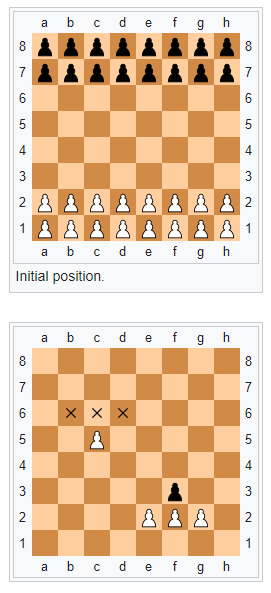

In [2]:
def initial_state():
    state=Board(5,5)
    
    row=0
    for col in range(5):
        state[row, col] = 1
        
    row=4
    for col in range(5):
        state[row, col] = 2
    
    return state

Now, let's see if this function works as intended

In [3]:
initial_state()

 1  1  1  1  1 
 0  0  0  0  0 
 0  0  0  0  0 
 0  0  0  0  0 
 2  2  2  2  2 

In [4]:
# Let's take a look at the index locations of the board
state=initial_state()
state.show_locations()

 0  1  2  3  4 
 5  6  7  8  9 
10 11 12 13 14 
15 16 17 18 19 
20 21 22 23 24 



In [5]:
def valid_moves(state, player):
    moves=[]
    player1Column1down=[0,5,10,15]
    player2Column1up=[5,10,15,20]
    player1Column5down=[4,9,14,19]
    player2Column5up=[9,14,19,24]

    # Player 1 valid forward moves
    if player==1:
        for location in range(20):
            if state[location]==1:
                newLocation=location+5
                if newLocation<len(state) and state[newLocation]==0:
                    moves.append((location,newLocation))

    # Player 2 valid forward moves
    if player==2:
        for location in range(5, 25):
            if state[location]==2:
                newLocation=location-5
                if newLocation>=0 and state[newLocation]==0:
                    moves.append((location,newLocation))
                
    # Player 1 valid diagonal moves right
    if player==1:
        for location in range(20):
            if state[location]==1:
                if location%5==4:
                    continue
                newLocation=location+6
                if newLocation<len(state) and state[newLocation]==2:
                    moves.append((location,newLocation))
                
    # Player 1 valid diagonal moves left
    if player==1:
        for location in range(5,25):
            if state[location]==1:
                if location%5==0:
                    continue
                newLocation=location+4
                if newLocation<len(state) and state[newLocation]==2:
                    moves.append((location,newLocation))
                    
    # Player 1 valid diagonal moves down column 1 (0 index)
    if player==1:
        for location in player1Column1down:
            if state[location]==1:
                newLocation=location+6
                if newLocation<len(state) and state[newLocation]==2:
                    moves.append((location,newLocation))
                    
    # Player 1 valid diagonal moves down column 5 (4 index)
    if player==1:
        for location in player1Column5down:
            if state[location]==1:
                newLocation=location+4
                if newLocation<len(state) and state[newLocation]==2:
                    moves.append((location,newLocation))
                
    # Player 2 valid diagonal moves right
    if player==2:
        for location in range(20):
            if state[location]==2:
                if location%5==4:
                    continue
                newLocation=location-6
                if newLocation>=0 and state[newLocation]==1:
                    moves.append((location,newLocation))
                
    # Player 2 valid diagonal moves left
    if player==2:
        for location in range(20):
            if state[location]==2:
                if location%5==0:
                    continue
                newLocation=location-4
                if newLocation>=0 and state[newLocation]==1:
                    moves.append((location,newLocation))
                    
    # Player 2 valid diagonal moves up column 1 (0 index)
    if player==2:
        for location in player2Column1up:
            if state[location]==2:
                newLocation=location-4
                if newLocation<len(state) and state[newLocation]==1:
                    moves.append((location,newLocation))
                    
    # Player 2 valid diagonal moves up column 5 (4 index)
    if player==2:
        for location in player2Column5up:
            if state[location]==2:
                newLocation=location-6
                if newLocation<len(state) and state[newLocation]==1:
                    moves.append((location,newLocation))

    return moves       

Let's see all valid moves for Player 1 at the start of the game

In [6]:
# Player 1
state=initial_state()
valid_moves(state,1)

[(0, 5), (1, 6), (2, 7), (3, 8), (4, 9)]

Let's see all valid moves for Player 2 at the start of the game

In [7]:
# Player 2
state=initial_state()
valid_moves(state,2)

[(20, 15), (21, 16), (22, 17), (23, 18), (24, 19)]

In [8]:
def update_state(state,player,move):
    start,end=move
    newState=state
    newState[start]=0
    newState[end]=player
    
    return newState

In [9]:
state=initial_state()
state[3]=state[6]=1
state[1]=state[1]=0
state

 1  0  1  1  1 
 0  1  0  0  0 
 0  0  0  0  0 
 0  0  0  0  0 
 2  2  2  2  2 

In [10]:
def win_status(state,player):
    # Win by reaching opposing players start row
    for col in range(5):
        if state[4, col]==1:
            return "win"
            
    for col in range(5):
        if state[0, col]==2:
            return "win"

    # Win by blocking and win by eliminating all opposing players' pieces
    if player==1 and not valid_moves(state,2):
        return "win"
    
    if player==2 and not valid_moves(state,1):
        return "win"

    return None


In [11]:
def human_move(state,player):
    
    while True:
        moves=eval(input("Enter your move"))

        if moves not in valid_moves(state,player):
            print("That is not a valid move")
        else:
            break
    
    return moves

human_agent=Agent(human_move)

In [12]:
def show_state(state,player):
    print(state)

In [13]:
def monkey_move(state,player):
    return random.choice(valid_moves(state,player))
monkey_agent=Agent(monkey_move)

In [14]:
from Game.minimax import *

In [15]:
def minimax_move(state,player):
    values,actions=minimax_values(state,player,display=False)
    return top_choice(actions,values)
minimax_agent=Agent(minimax_move)

In [16]:
state=initial_state()
minimax_values(state,1)  # state, player

  Choice Time: 1 minutes 33.77448058128357 seconds 


([-1, -1, -1, -1, -1], [(4, 9), (3, 8), (2, 7), (1, 6), (0, 5)])

In [17]:
minimax_move(state,1)

(2, 7)

In [30]:
g=Game()
g.run(monkey_agent,monkey_agent)

====
Game  1
 1  1  1  1  1 
 0  0  0  0  0 
 0  0  0  0  0 
 0  0  0  0  0 
 2  2  2  2  2 

Player 1 moves (0, 5)
 0  1  1  1  1 
 1  0  0  0  0 
 0  0  0  0  0 
 0  0  0  0  0 
 2  2  2  2  2 

Player 2 moves (20, 15)
 0  1  1  1  1 
 1  0  0  0  0 
 0  0  0  0  0 
 2  0  0  0  0 
 0  2  2  2  2 

Player 1 moves (1, 6)
 0  0  1  1  1 
 1  1  0  0  0 
 0  0  0  0  0 
 2  0  0  0  0 
 0  2  2  2  2 

Player 2 moves (23, 18)
 0  0  1  1  1 
 1  1  0  0  0 
 0  0  0  0  0 
 2  0  0  2  0 
 0  2  2  0  2 

Player 1 moves (4, 9)
 0  0  1  1  0 
 1  1  0  0  1 
 0  0  0  0  0 
 2  0  0  2  0 
 0  2  2  0  2 

Player 2 moves (21, 16)
 0  0  1  1  0 
 1  1  0  0  1 
 0  0  0  0  0 
 2  2  0  2  0 
 0  0  2  0  2 

Player 1 moves (2, 7)
 0  0  0  1  0 
 1  1  1  0  1 
 0  0  0  0  0 
 2  2  0  2  0 
 0  0  2  0  2 

Player 2 moves (24, 19)
 0  0  0  1  0 
 1  1  1  0  1 
 0  0  0  0  0 
 2  2  0  2  2 
 0  0  2  0  0 

Player 1 moves (7, 12)
 0  0  0  1  0 
 1  1  0  0  1 
 0  0  1  0  0 
 2 

[2]

In [20]:
g=Game()
g.run(minimax_agent,monkey_agent)

====
Game  1
 1  1  1  1  1 
 0  0  0  0  0 
 0  0  0  0  0 
 0  0  0  0  0 
 2  2  2  2  2 

Player 1 moves (3, 8)
 1  1  1  0  1 
 0  0  0  1  0 
 0  0  0  0  0 
 0  0  0  0  0 
 2  2  2  2  2 

Player 2 moves (21, 16)
 1  1  1  0  1 
 0  0  0  1  0 
 0  0  0  0  0 
 0  2  0  0  0 
 2  0  2  2  2 

Player 1 moves (8, 13)
 1  1  1  0  1 
 0  0  0  0  0 
 0  0  0  1  0 
 0  2  0  0  0 
 2  0  2  2  2 

Player 2 moves (20, 15)
 1  1  1  0  1 
 0  0  0  0  0 
 0  0  0  1  0 
 2  2  0  0  0 
 0  0  2  2  2 

Player 1 moves (2, 7)
 1  1  0  0  1 
 0  0  1  0  0 
 0  0  0  1  0 
 2  2  0  0  0 
 0  0  2  2  2 

Player 2 moves (22, 17)
 1  1  0  0  1 
 0  0  1  0  0 
 0  0  0  1  0 
 2  2  2  0  0 
 0  0  0  2  2 

Player 1 moves (7, 12)
 1  1  0  0  1 
 0  0  0  0  0 
 0  0  1  1  0 
 2  2  2  0  0 
 0  0  0  2  2 

Player 2 moves (23, 18)
 1  1  0  0  1 
 0  0  0  0  0 
 0  0  1  1  0 
 2  2  2  2  0 
 0  0  0  0  2 

Player 1 moves (0, 5)
 0  1  0  0  1 
 1  0  0  0  0 
 0  0  1  1  0 
 2

[1]

In [21]:
g=Game()
g.run(monkey_agent,human_agent)

====
Game  1
 1  1  1  1  1 
 0  0  0  0  0 
 0  0  0  0  0 
 0  0  0  0  0 
 2  2  2  2  2 

Player 1 moves (1, 6)
 1  0  1  1  1 
 0  1  0  0  0 
 0  0  0  0  0 
 0  0  0  0  0 
 2  2  2  2  2 



Enter your move 20,15


Player 2 moves (20, 15)
 1  0  1  1  1 
 0  1  0  0  0 
 0  0  0  0  0 
 2  0  0  0  0 
 0  2  2  2  2 

Player 1 moves (4, 9)
 1  0  1  1  0 
 0  1  0  0  1 
 0  0  0  0  0 
 2  0  0  0  0 
 0  2  2  2  2 



Enter your move 24,19


Player 2 moves (24, 19)
 1  0  1  1  0 
 0  1  0  0  1 
 0  0  0  0  0 
 2  0  0  0  2 
 0  2  2  2  0 

Player 1 moves (6, 11)
 1  0  1  1  0 
 0  0  0  0  1 
 0  1  0  0  0 
 2  0  0  0  2 
 0  2  2  2  0 



Enter your move 19,14


Player 2 moves (19, 14)
 1  0  1  1  0 
 0  0  0  0  1 
 0  1  0  0  2 
 2  0  0  0  0 
 0  2  2  2  0 

Player 1 moves (3, 8)
 1  0  1  0  0 
 0  0  0  1  1 
 0  1  0  0  2 
 2  0  0  0  0 
 0  2  2  2  0 



Enter your move 14,8


Player 2 moves (14, 8)
 1  0  1  0  0 
 0  0  0  2  1 
 0  1  0  0  0 
 2  0  0  0  0 
 0  2  2  2  0 

Player 1 moves (2, 7)
 1  0  0  0  0 
 0  0  1  2  1 
 0  1  0  0  0 
 2  0  0  0  0 
 0  2  2  2  0 



Enter your move 8,3


Player 2 moves (8, 3)
 1  0  0  2  0 
 0  0  1  0  1 
 0  1  0  0  0 
 2  0  0  0  0 
 0  2  2  2  0 

Player  2 won.


[2]

In [22]:
g=Game()
g.run(human_agent,human_agent)

====
Game  1
 1  1  1  1  1 
 0  0  0  0  0 
 0  0  0  0  0 
 0  0  0  0  0 
 2  2  2  2  2 



Enter your move 0,5


Player 1 moves (0, 5)
 0  1  1  1  1 
 1  0  0  0  0 
 0  0  0  0  0 
 0  0  0  0  0 
 2  2  2  2  2 



Enter your move 24,19


Player 2 moves (24, 19)
 0  1  1  1  1 
 1  0  0  0  0 
 0  0  0  0  0 
 0  0  0  0  2 
 2  2  2  2  0 



Enter your move 1,6


Player 1 moves (1, 6)
 0  0  1  1  1 
 1  1  0  0  0 
 0  0  0  0  0 
 0  0  0  0  2 
 2  2  2  2  0 



Enter your move 21,16


Player 2 moves (21, 16)
 0  0  1  1  1 
 1  1  0  0  0 
 0  0  0  0  0 
 0  2  0  0  2 
 2  0  2  2  0 



Enter your move 6,11


Player 1 moves (6, 11)
 0  0  1  1  1 
 1  0  0  0  0 
 0  1  0  0  0 
 0  2  0  0  2 
 2  0  2  2  0 



Enter your move 22,17


Player 2 moves (22, 17)
 0  0  1  1  1 
 1  0  0  0  0 
 0  1  0  0  0 
 0  2  2  0  2 
 2  0  0  2  0 



Enter your move 5,10


Player 1 moves (5, 10)
 0  0  1  1  1 
 0  0  0  0  0 
 1  1  0  0  0 
 0  2  2  0  2 
 2  0  0  2  0 



Enter your move 17,11


Player 2 moves (17, 11)
 0  0  1  1  1 
 0  0  0  0  0 
 1  2  0  0  0 
 0  2  0  0  2 
 2  0  0  2  0 



Enter your move 10,16


Player 1 moves (10, 16)
 0  0  1  1  1 
 0  0  0  0  0 
 0  2  0  0  0 
 0  1  0  0  2 
 2  0  0  2  0 



Enter your move 20,16


Player 2 moves (20, 16)
 0  0  1  1  1 
 0  0  0  0  0 
 0  2  0  0  0 
 0  2  0  0  2 
 0  0  0  2  0 



Enter your move 11,6


That is not a valid move


Enter your move 2,7


Player 1 moves (2, 7)
 0  0  0  1  1 
 0  0  1  0  0 
 0  2  0  0  0 
 0  2  0  0  2 
 0  0  0  2  0 



Enter your move 11,7


Player 2 moves (11, 7)
 0  0  0  1  1 
 0  0  2  0  0 
 0  0  0  0  0 
 0  2  0  0  2 
 0  0  0  2  0 



Enter your move 3,7


That is not a valid move


Enter your move 4,9


Player 1 moves (4, 9)
 0  0  0  1  0 
 0  0  2  0  1 
 0  0  0  0  0 
 0  2  0  0  2 
 0  0  0  2  0 



Enter your move 7,2


Player 2 moves (7, 2)
 0  0  2  1  0 
 0  0  0  0  1 
 0  0  0  0  0 
 0  2  0  0  2 
 0  0  0  2  0 

Player  2 won.


[2]